# 正準相関分析 （アヤメのデータ）

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA
from sklearn import datasets


In [17]:
# data = np.loadtxt("iris.dat",comments='#')
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
y_name = target_names[iris.target]

print('Size of the data = ', X.shape)
n = X.shape[0]
mdim = X.shape[1]
print('N=', n, 'mdim=', mdim)
print('size of y', y.shape)

# normarize X
xmean = np.mean(X, axis=0)
xsd = np.std(X, axis=0)
X = (X - xmean)/xsd
print(X)

# One hot encoding
n_labels = len(np.unique(y))
Y = np.eye(n_labels)[y]

print(Y)

Size of the data =  (150, 4)
N= 150 mdim= 4
size of y (150,)
[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 

CCA

In [18]:
# Canonical Correlation Analysis (CCA)

cca = CCA(n_components=2)
cca.fit(X, Y)
X_r, Y_r = cca.transform(X, Y)

print('the coefficient of determination R^2 =', cca.score(X, Y))

the coefficient of determination R^2 = 0.5842906437944523


In [19]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


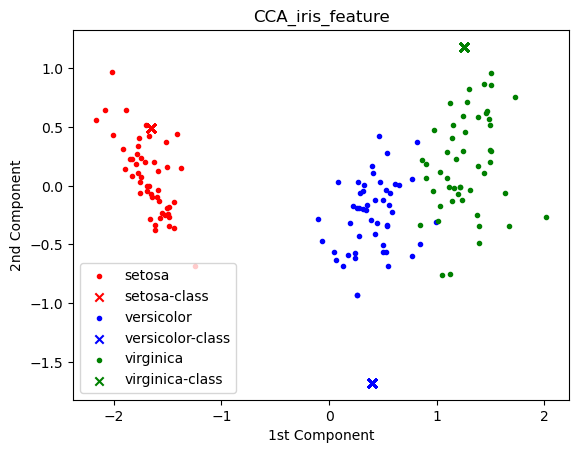

In [20]:
## colors
colors = ['red', 'blue', 'green']

## plot
plt.figure()
for c, target_name  in zip(colors, target_names):
    plt.scatter(X_r[y_name == target_name, 0], X_r[y_name == target_name, 1], c=c, marker='.', label = target_name)
    plt.scatter(Y_r[y_name == target_name, 0], Y_r[y_name == target_name, 1], c=c, marker='x', label = target_name+"-class")
    
plt.legend()
plt.title('CCA_iris_feature')
plt.xlabel('1st Component')
plt.ylabel('2nd Component')
plt.savefig('CCA_iris_feature.eps')
plt.show()